# Dimensionality reduction with (vanilla) autoencoder

In [1]:
#load MNIST dataset 

%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
#(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

#use the first 10k in the training dataset (just for demo)
x_train = x_train[0:10000]
y_train = y_train[0:10000]

#normalize the images
x_train = np.expand_dims(x_train/255.0, axis=-1)
x_test = np.expand_dims(x_test/255.0, axis=-1)

#define the labels
class_names = ['zero', 'one', 'two', 'three', 'four',
               'five', 'six', 'seven', 'eight', 'nine']

print(x_train.shape)
print(x_test.shape)

(10000, 28, 28, 1)
(10000, 28, 28, 1)


In [2]:
#plot function for sample images

def plot_tile(samples):
    
    num_samples, x_dim, y_dim, _ = samples.shape
    axes = (np.round(np.sqrt(num_samples))).astype(int)
    fig = plt.figure(figsize=(axes, axes))
    gs = gridspec.GridSpec(axes, axes)
    gs.update(wspace=0.05, hspace=0.05)

    for i, sample in enumerate(samples):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_aspect('equal')
        plt.imshow(sample, cmap=plt.get_cmap('viridis'), aspect='auto')

Number of training data points (1001, 28, 28, 1)
Number of training data points (1127, 28, 28, 1)
Number of training data points (991, 28, 28, 1)
Number of training data points (1032, 28, 28, 1)
Number of training data points (980, 28, 28, 1)
Number of training data points (863, 28, 28, 1)
Number of training data points (1014, 28, 28, 1)
Number of training data points (1070, 28, 28, 1)
Number of training data points (944, 28, 28, 1)
Number of training data points (978, 28, 28, 1)


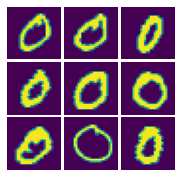

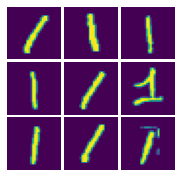

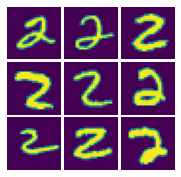

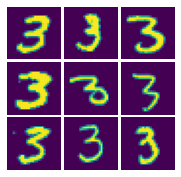

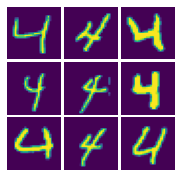

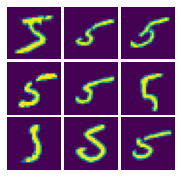

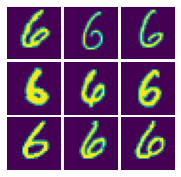

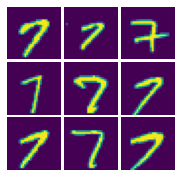

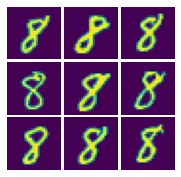

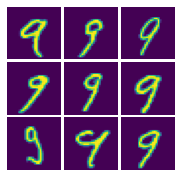

In [3]:
#visualize first 9 samples of input images based on class labels, within the training dataset

unique_labels, label_counts = np.unique(y_train, return_counts=True)

for label in unique_labels:
    x_train_perlabel = x_train[np.squeeze(y_train) == label]
    print("Number of training data points {}".format(x_train_perlabel.shape))
    fig = plot_tile(x_train_perlabel[0:9, :, :])

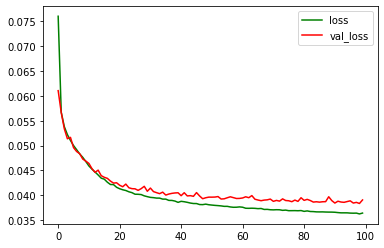

In [4]:
import autoencoder

z_dim = 3

AE = autoencoder.Autoencoder(x_train.shape[1], x_train.shape[2], z_dim)
AE.train_autoencoder2D(x_train, load = False)

In [5]:
#lets get some reconstructions with the trained model

recons_train = AE.AE_m2m.predict(x_train)
recons_test = AE.AE_m2m.predict(x_test)

print(recons_train.shape)
print(recons_test.shape)

(10000, 28, 28, 1)
(10000, 28, 28, 1)


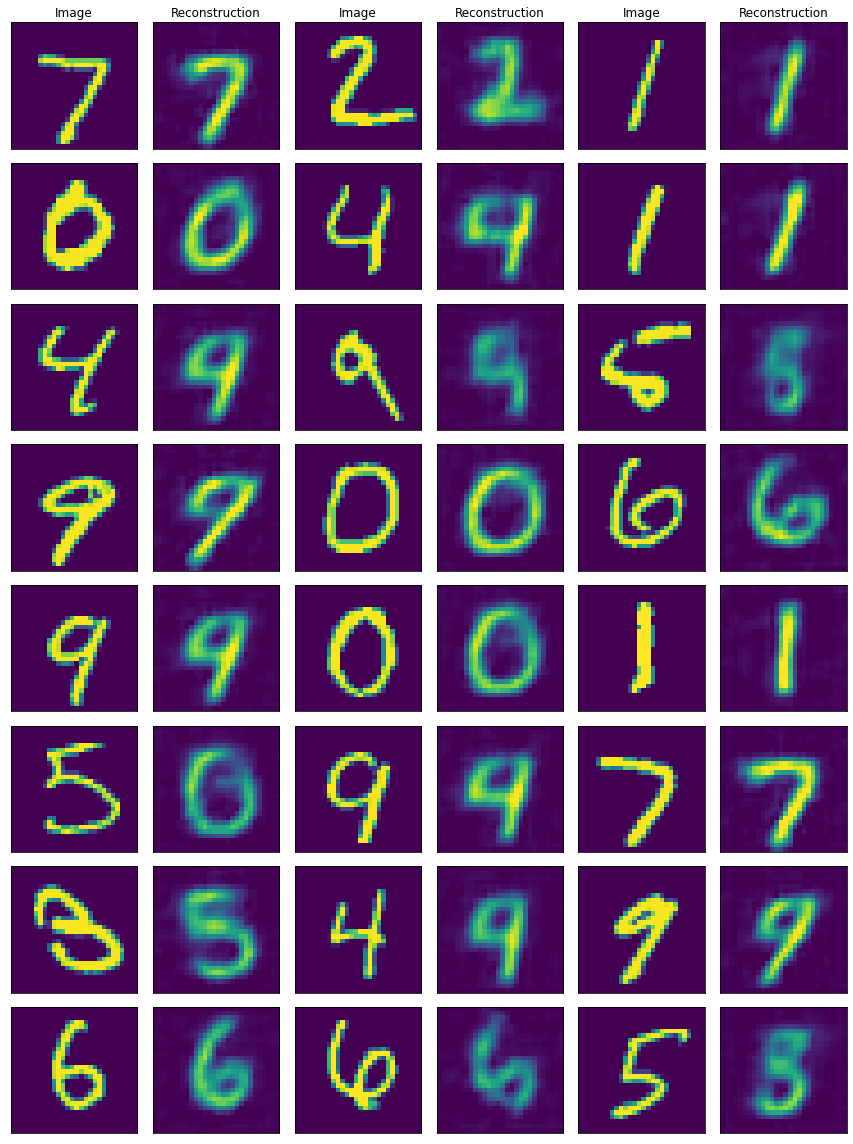

In [6]:
#plot some test images with predicted vs true labels
#correct predictions (colored blue) and incorrect predictions (colored red)

num_rows = 8
num_cols = 3
num_images = num_rows*num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i], vmin=0, vmax=1)
    if i < 3:
        plt.title('Image')
    
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(recons_test[i], vmin=0, vmax=1)
    if i < 3:
        plt.title('Reconstruction')
    
plt.tight_layout()
plt.show()

(10000, 3)


Text(0.5, 1.0, &#39;Feature space&#39;)

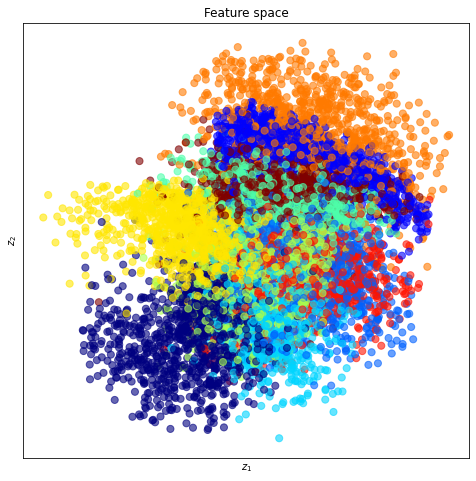

In [7]:
#plot the first few latent variables (out of 64!) and color code with label

z_test = AE.AE_m2z.predict(x_test)
print(z_test.shape)

import matplotlib.cm as cm
from matplotlib.colors import Normalize

fig, ax = plt.subplots(1,1, figsize = (8, 8))

my_cmap = cm.get_cmap('jet')
my_norm = Normalize(vmin=0, vmax=9)
cs = my_cmap(my_norm(y_test))

ax.scatter(z_test[:, 0], z_test[:, 1], s=50, c=cs, alpha=0.6)
ax.set_xticks([])
ax.set_yticks([])
plt.xlabel('$z_1$')
plt.ylabel('$z_2$')
plt.title('Feature space')

## Latent space exploration

(10, 1, 3)
(10, 28, 28, 1)


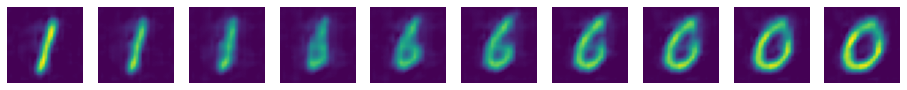

In [8]:
#sample two images from the testing set and uniformly sample the latent spaces (all zs)
sample_1 = x_test[2:3]
sample_2 = x_test[3:4]
sample_1_z = AE.AE_m2z.predict(sample_1)
sample_2_z = AE.AE_m2z.predict(sample_2)

num_samples = 10
samples_z = np.linspace(sample_1_z, sample_2_z, num_samples, endpoint=True)

#display the reconstructed images from the samples
samples_image = AE.AE_z2m.predict(np.squeeze(samples_z))

print(samples_z.shape)
print(samples_image.shape)

#display sampled images
plt.figure(figsize=[16, 4])
for i in range(num_samples):
    plt.subplot(1, 10, i+1)
    plt.imshow(np.squeeze(samples_image[i:i+1]), vmin=0, vmax=1)
    plt.axis('off')

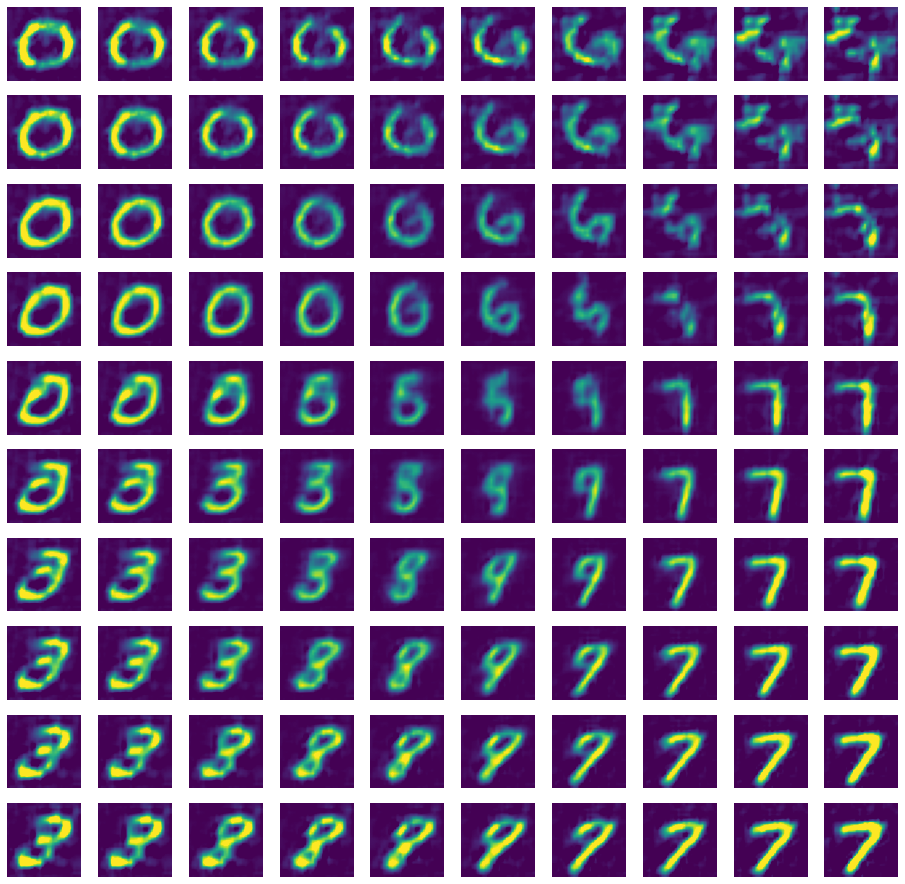

In [24]:
#sample a grid, uniformly sample the first two zs, and for the rest, use the mean zs
z_dim= 3
samples_z_grid = np.ones([num_samples, num_samples, num_samples, z_dim])
samples_image_grid = np.ones([num_samples, num_samples, num_samples, x_test.shape[1], x_test.shape[2], 1])

z1_min = z_test[:, 0].min()
z1_max = z_test[:, 0].max()
z2_min = z_test[:, 1].min()
z2_max = z_test[:, 1].max()
z3_min = z_test[:, 2].min()
z3_max = z_test[:, 2].max()


samples_z1 = np.linspace(z1_min, z1_max, num_samples, endpoint=True)
samples_z2 = np.linspace(z2_min, z2_max, num_samples, endpoint=True)
samples_z3 = np.linspace(z3_min, z3_max, num_samples, endpoint=True)

for i in range(num_samples):
    for j in range(num_samples):
        for k in range(num_samples):
            samples_z_grid[i, j, k, 0] = samples_z1[i]
            samples_z_grid[i, j, k, 1] = samples_z2[j]
            samples_z_grid[i, j, k, 2] = samples_z3[k]

for i in range(num_samples):
    for j in range(num_samples):
        for k in range(num_samples):
            samples_image_grid[i, j, k, :, :, :] = AE.AE_z2m.predict(np.expand_dims(samples_z_grid[i, j ,k, :], axis=0))

#display sampled images
plt.figure(figsize=[16, 16])
for i in range(num_samples):
    for j in range(num_samples):
        k = 5
        plt.subplot(10, 10, i*num_samples + j + 1)
        plt.imshow(np.squeeze(samples_image_grid[i, j, k, :, :, :] ), vmin=0, vmax=1)
        plt.axis('off')

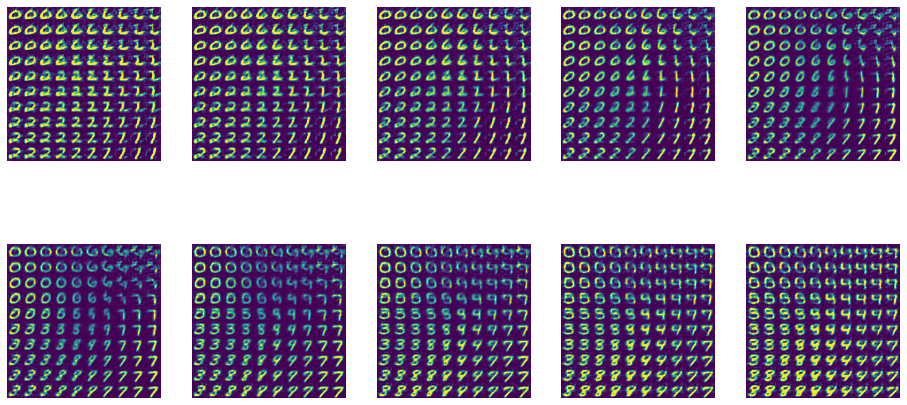

In [34]:
#tile the image into a cube of (28x10, 28x10, 10)
samples_image_cube = np.ones([num_samples*x_test.shape[1], num_samples*x_test.shape[2], num_samples])

for k in range(num_samples):
    for i in range(num_samples):
        for j in range(num_samples):
                i_idx_start = i*x_test.shape[1]
                i_idx_end = i_idx_start + x_test.shape[1]
                j_idx_start = j*x_test.shape[2]
                j_idx_end = j_idx_start + x_test.shape[2]
                samples_image_cube[i_idx_start:i_idx_end, j_idx_start:j_idx_end, k] = samples_image_grid[i, j, k, :, :, 0]

plt.figure(figsize=[16, 8])
for i in range(num_samples):
    plt.subplot(2, 5, i+1)
    plt.imshow(samples_image_cube[:, :, i], vmin=0, vmax=1)
    plt.axis('off')

&lt;IPython.core.display.Image object&gt;

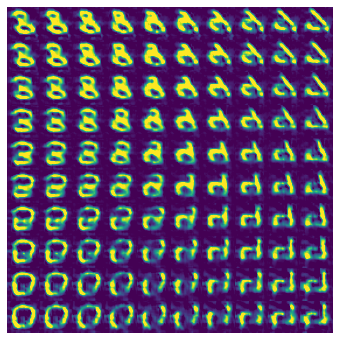

In [50]:
#create GIF
#flip the GIF
from matplotlib import animation, rc
from IPython.display import HTML, Image
plt.rcParams['animation.html'] = 'jshtml'

nfr = num_samples     # Depth
fps = 2      # Frame per sec Speed of simulation 

fig = plt.figure(figsize=[6, 6])
im = plt.imshow(samples_image_cube[:, :, 0], vmin=0, vmax=1, origin="upper")
plt.xlim(0, num_samples*x_test.shape[1])
plt.ylim(0, num_samples*x_test.shape[2])
plt.axis('off')

def update(ifrm, samples_image_cube, nfr):
    im.set_array(samples_image_cube[:, :, ifrm])

ani = animation.FuncAnimation(fig, update, nfr, fargs=(samples_image_cube, nfr), interval=300)
HTML(ani.to_jshtml())

ani.save('AE.gif', writer='pillow', fps=fps)
Image(url='AE.gif')